# 1. data

In [122]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import seaborn as sns

In [24]:
metadata=pd.read_csv("wine-clustering.csv")
metadata.head(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   
5    14.20        1.76  2.45          15.2        112           3.27   
6    14.39        1.87  2.45          14.6         96           2.50   
7    14.06        2.15  2.61          17.6        121           2.60   
8    14.83        1.64  2.17          14.0         97           2.80   
9    13.86        1.35  2.27          16.0         98           2.98   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735  
5   2.85     1450  
6   3.58     1290  
7   3.58     1295  
8   2.85     1045  
9   3.55     1045

In [25]:
metadata.shape

(178, 13)

In [26]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [27]:
metadata.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

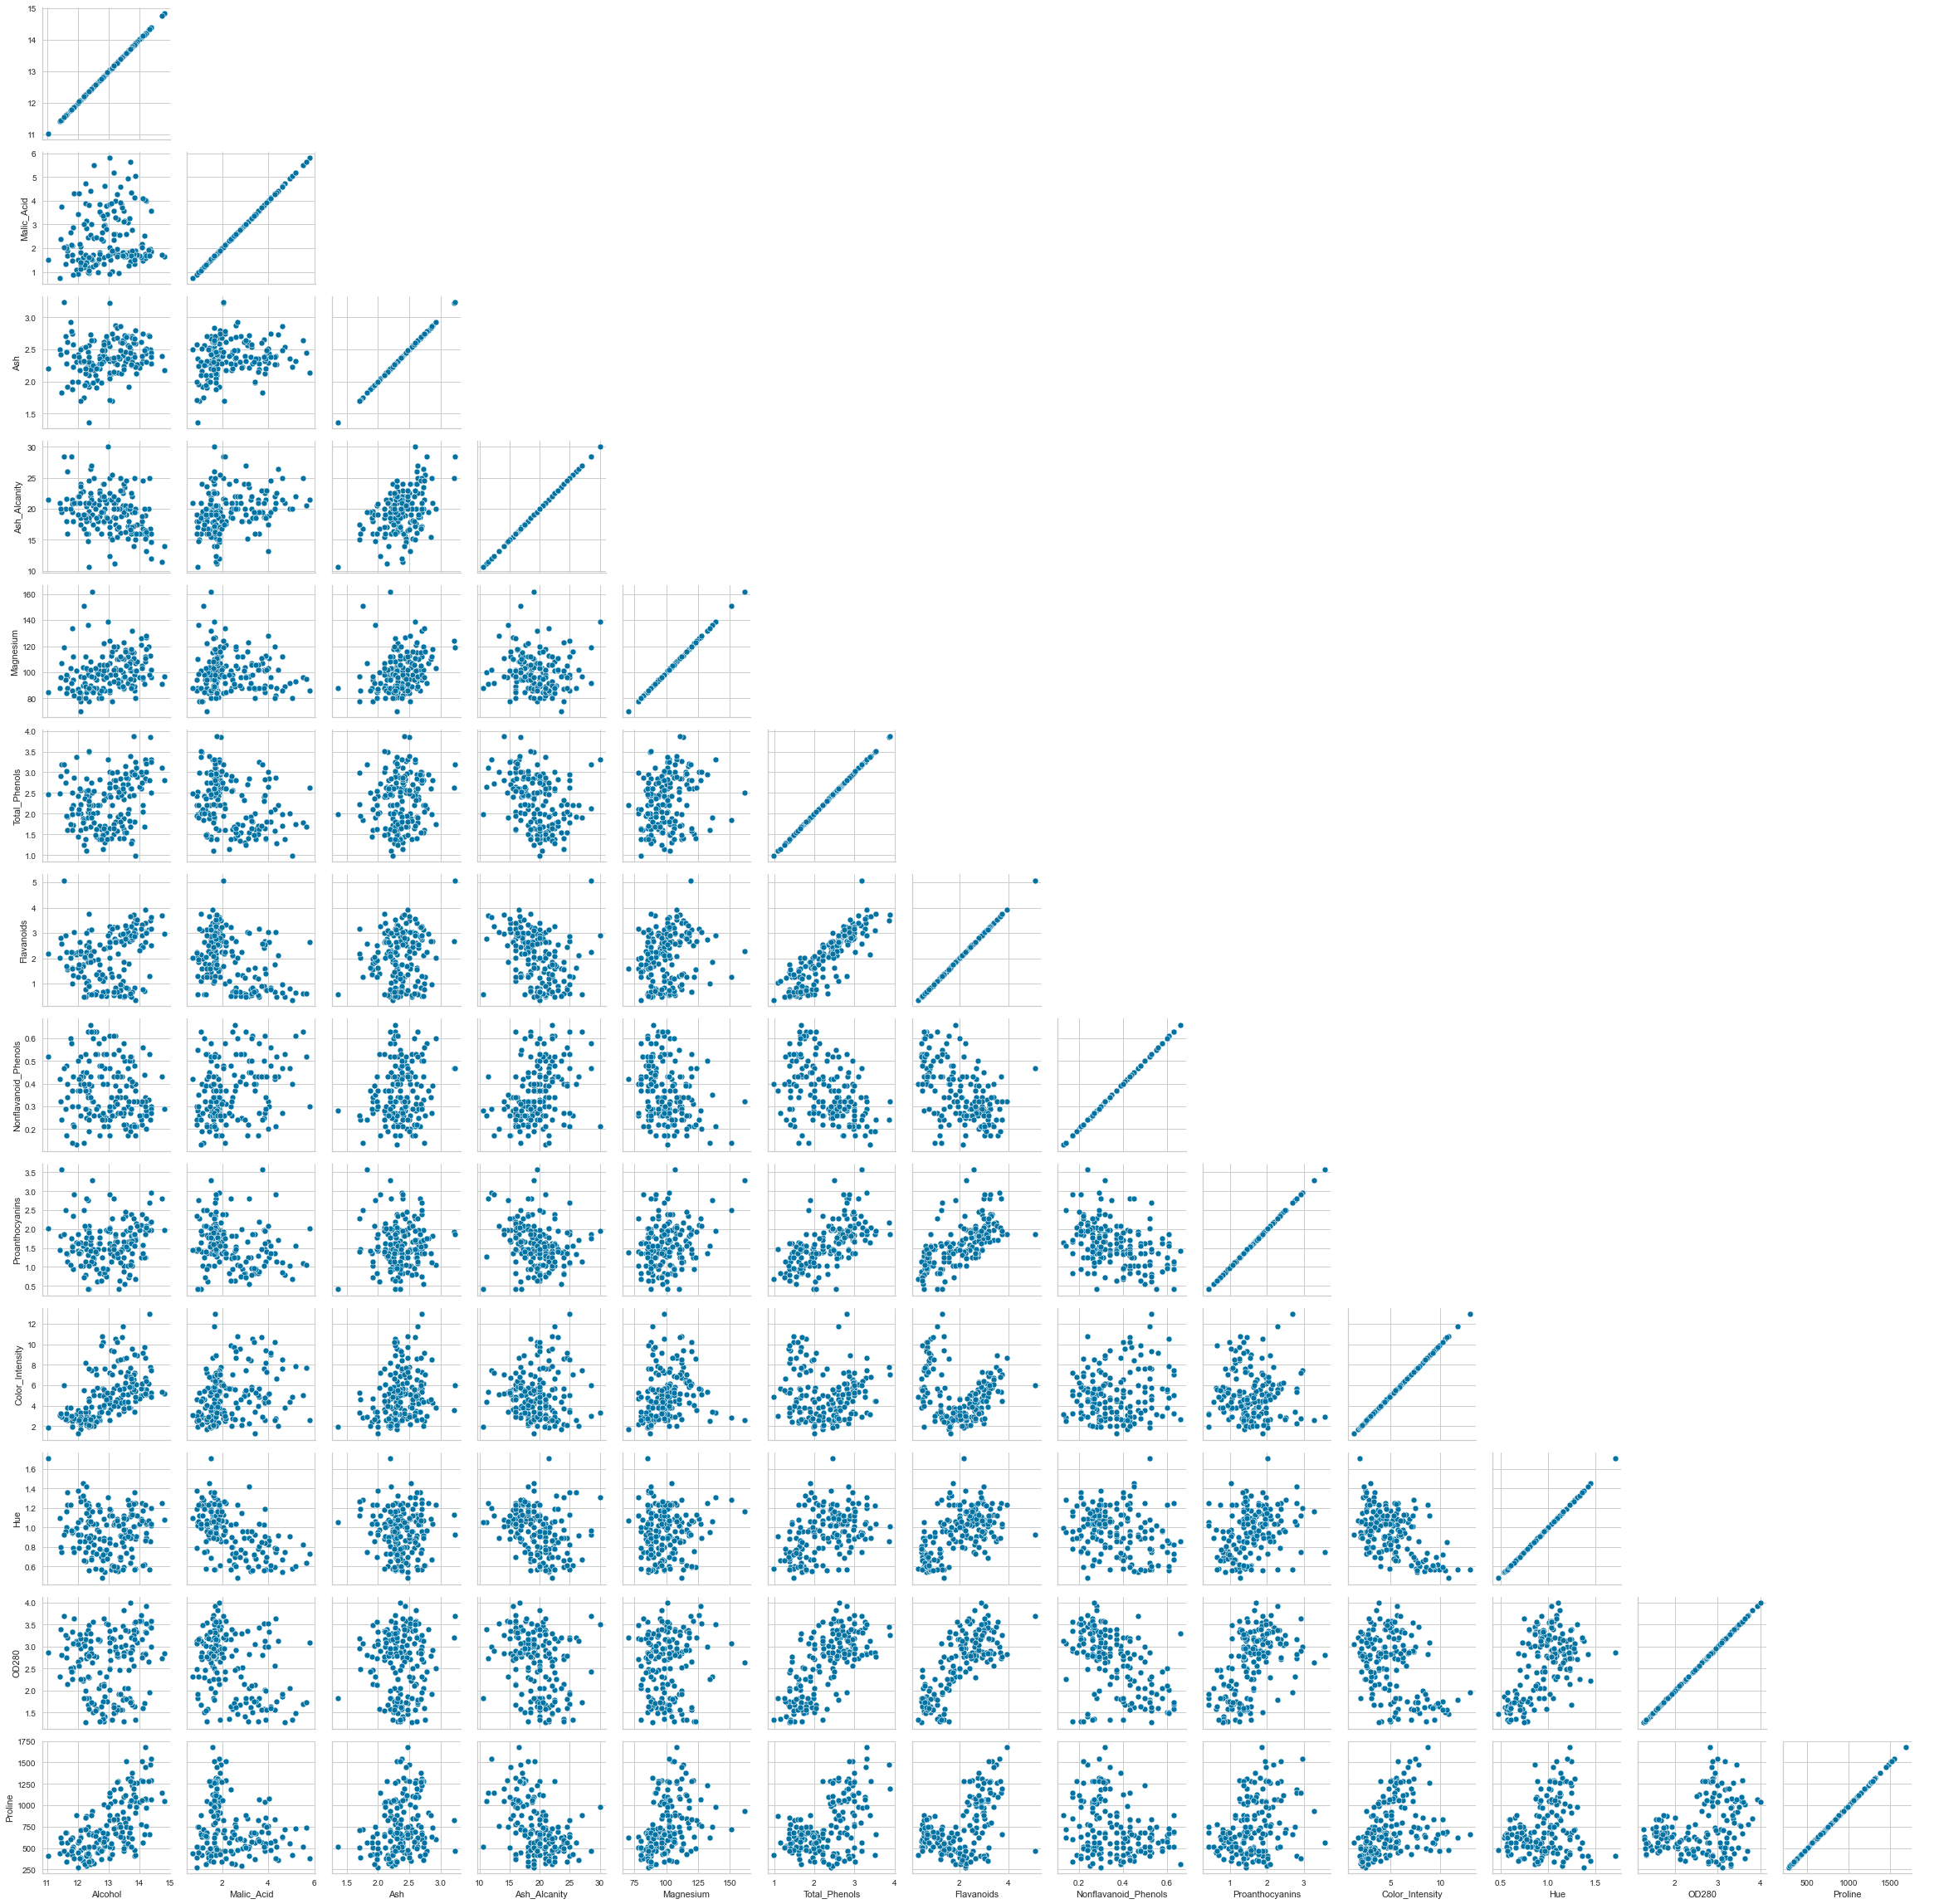

In [28]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(metadata, corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

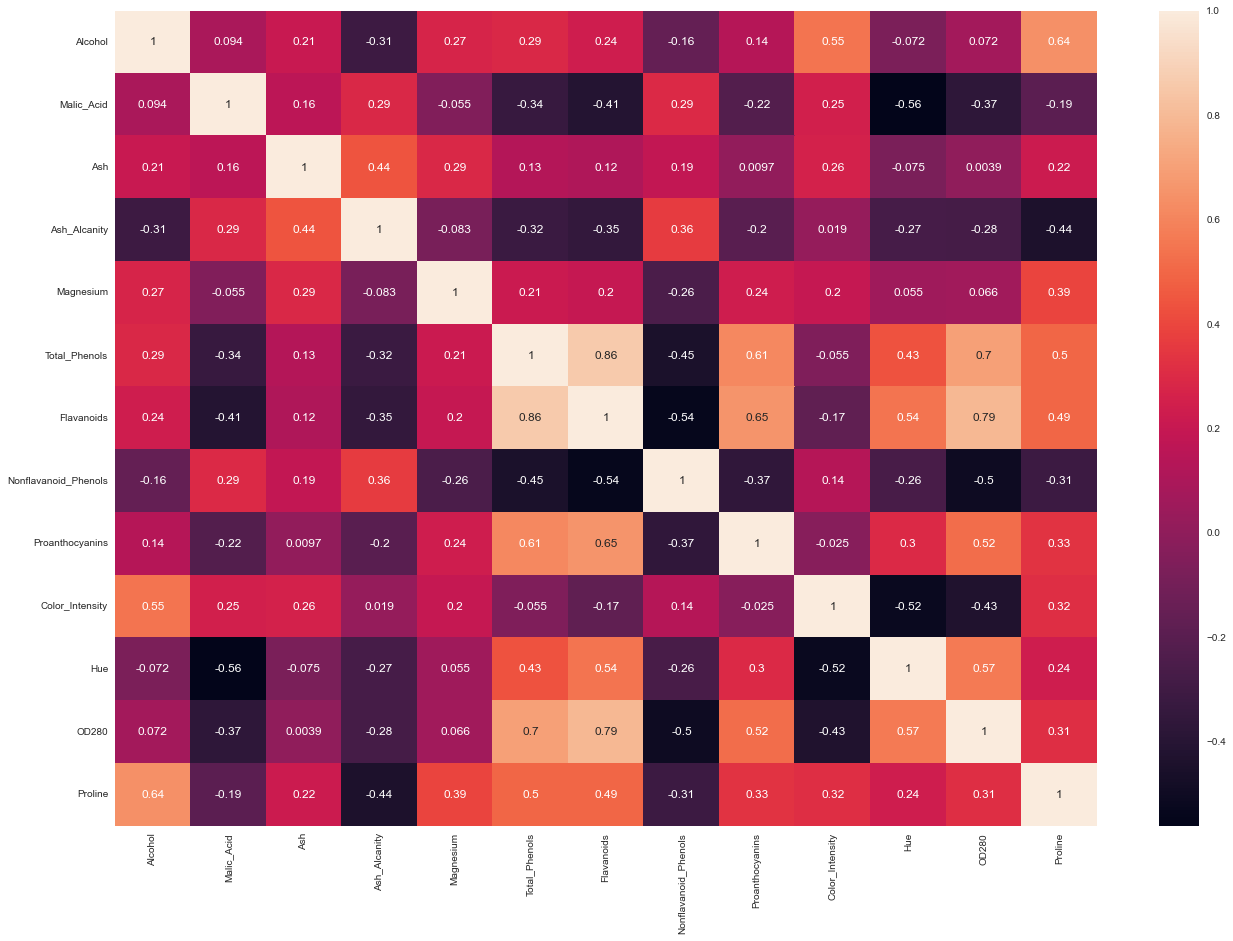

In [29]:
#Correlation Analysis
plt.figure(figsize=(22,15))
sns.heatmap(metadata.corr(), annot=True)
plt.show()

# 2. KMeans

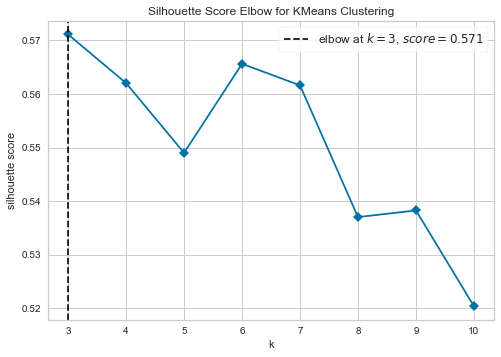

In [30]:
kmeans = KMeans()
kviz = KElbowVisualizer(kmeans, k=(3,11), metric='silhouette', timings=False)
kviz.fit(metadata)
kviz.show()
plt.show()

In [31]:
#Train the Model
kmeans = KMeans(n_clusters=3).fit(metadata)
metadata['cluster'] = kmeans.labels_

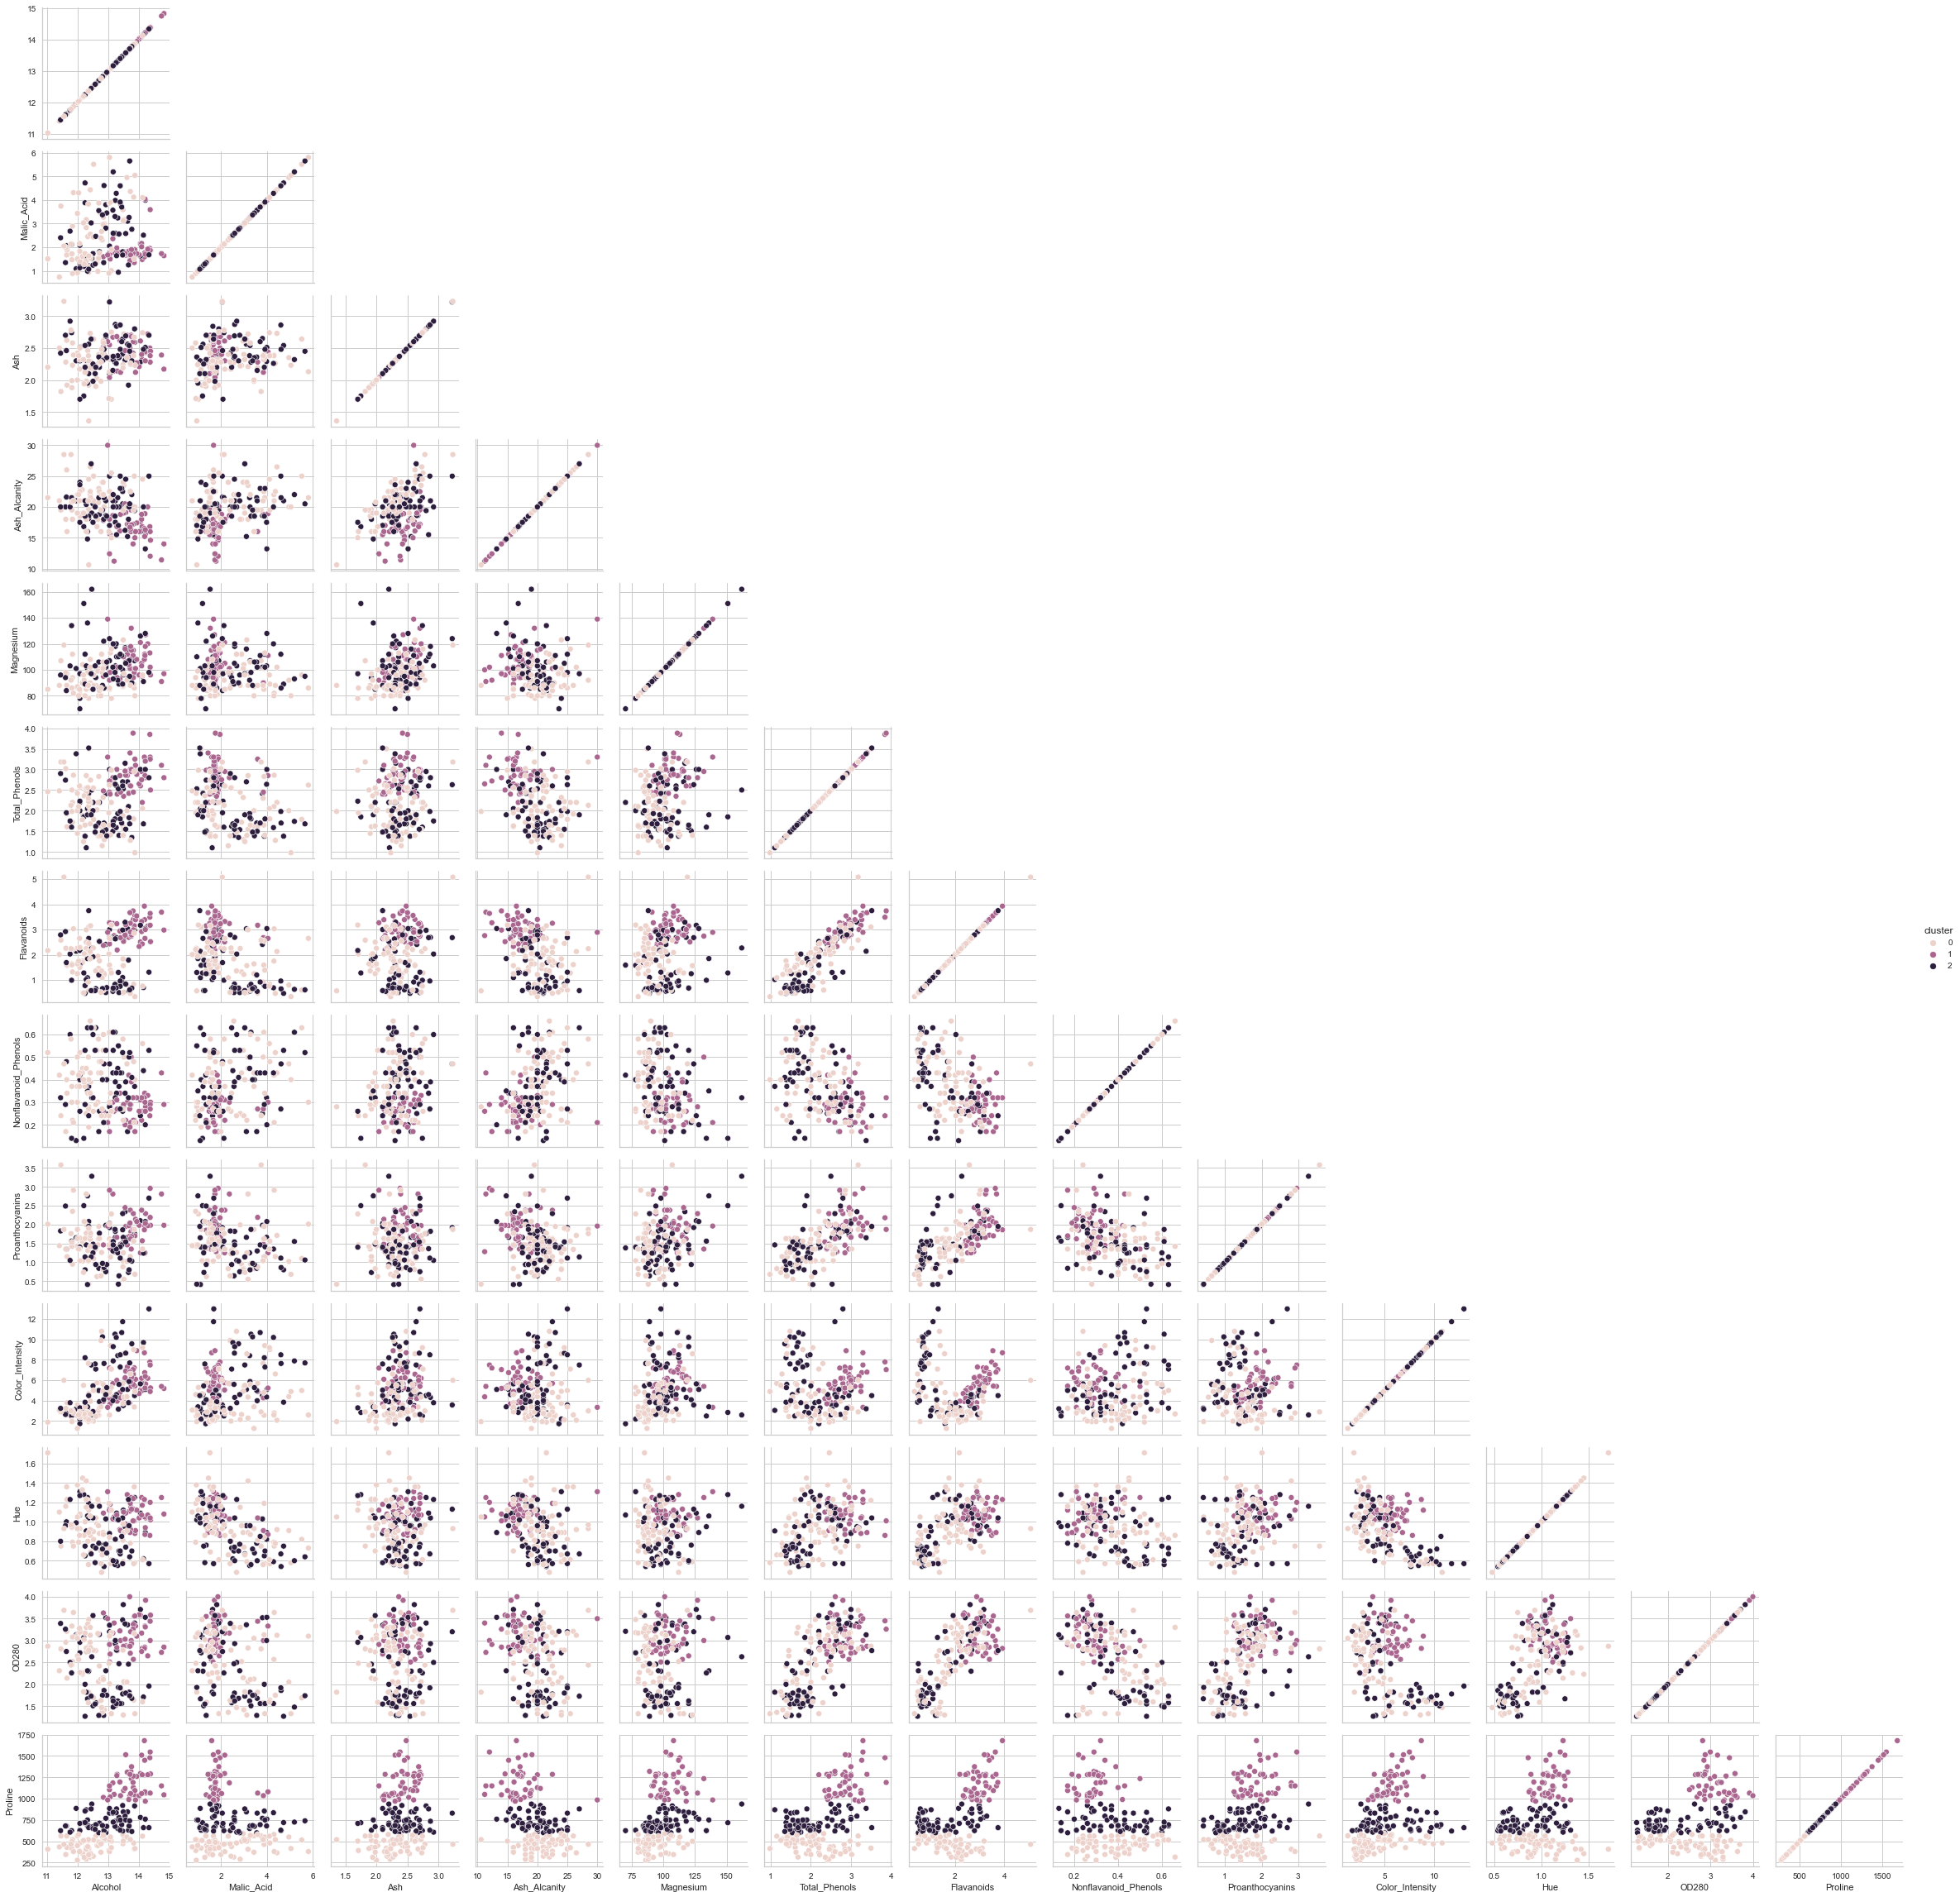

In [32]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(metadata, hue="cluster", corner=True)
g.map(sns.scatterplot)
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend()

inertia: within cluster sum of squres, 各sample到各該群的centroid的距離之平方和，用來評估cluster的成效，越大代表越差

In [33]:
kmeans.inertia_

2370689.686782968

查看各cluster的中心，並在圖上畫出

In [34]:
kmeans.cluster_centers_

array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

c:\Users\betty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


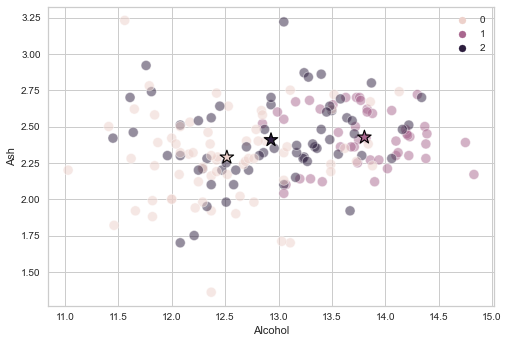

In [85]:
ax = sns.scatterplot(data= metadata, x='Alcohol', y='Ash', hue=kmeans.labels_, alpha=0.5, s=100)
ax = sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2],
                     hue=range(3), s=200,marker='*', ec='black', legend=False, ax=ax)

In [105]:
def show_centers(x, y, centers, color, label):
    x_col = metadata.columns.get_loc(x.name)
    if y is None: # for the histograms
        plt.axvline(centers[label, x_col], color='r', ls=':')
    else:
        y_col = metadata.columns.get_loc(y.name)
        plt.scatter(centers[label, x_col], centers[label, y_col], marker='*', color='r', s=50)

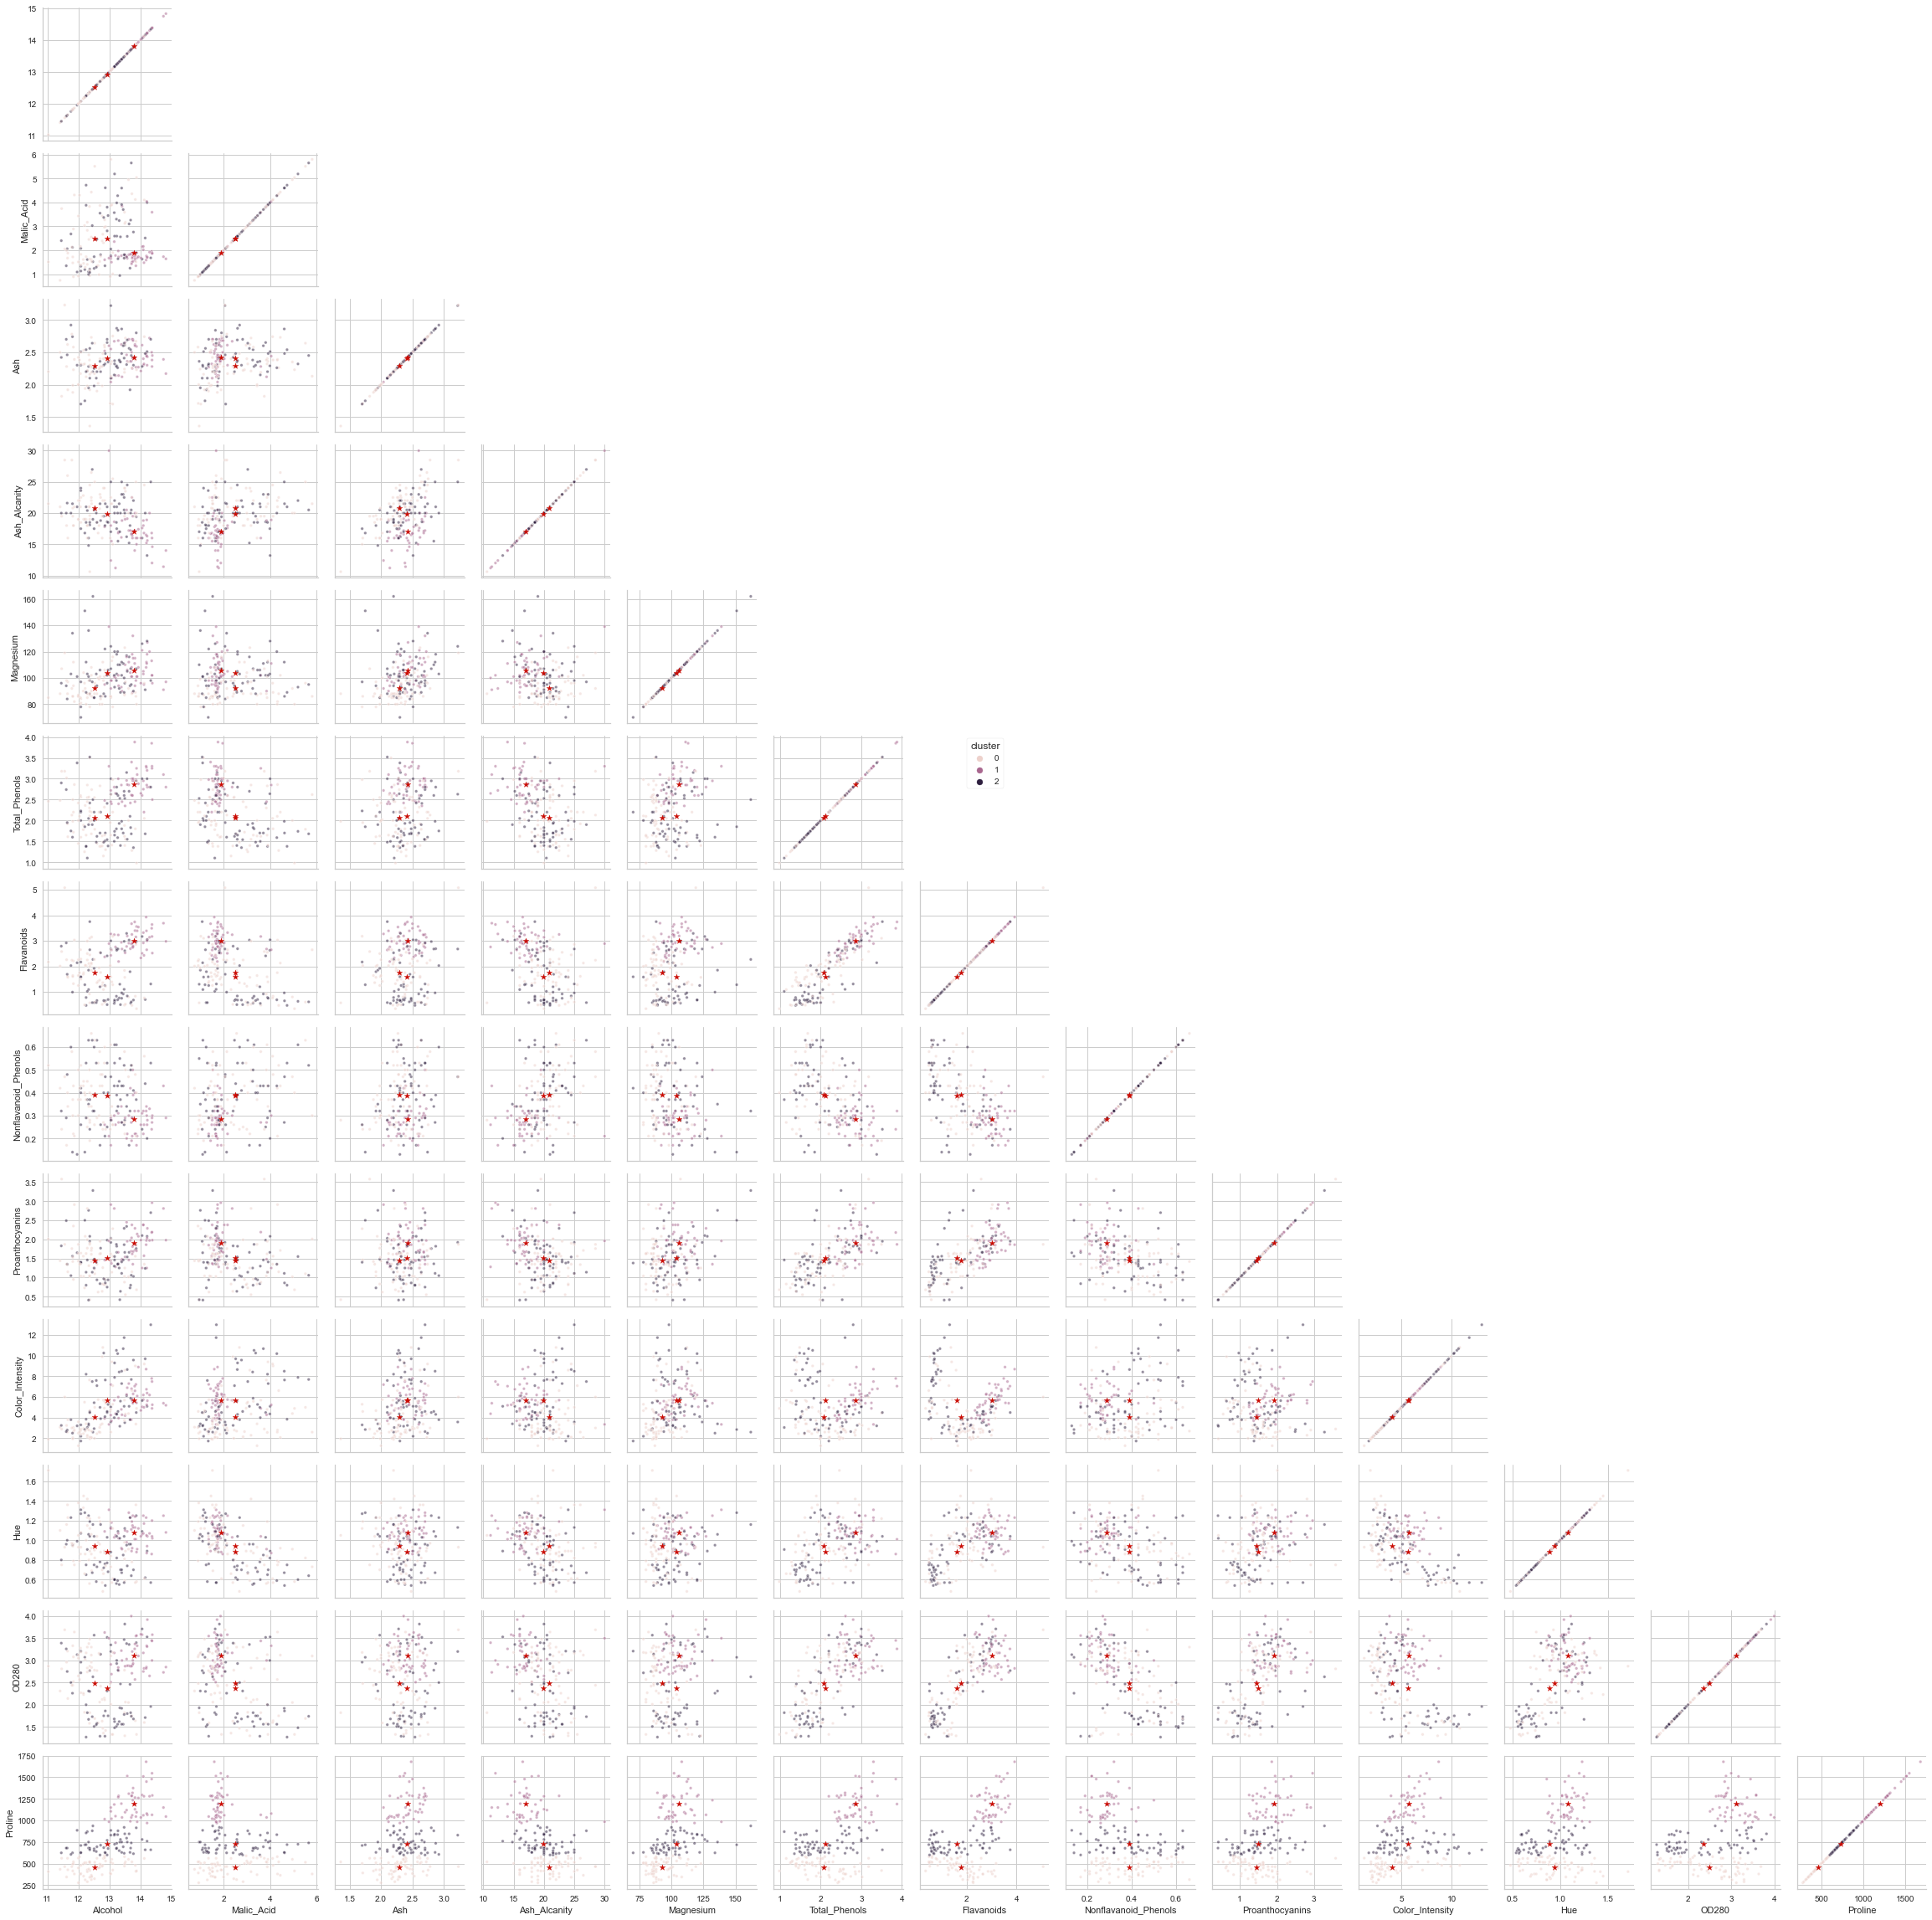

In [108]:
# Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(metadata, hue="corona_result",corner=True)
g = sns.PairGrid(metadata, hue="cluster", corner=True)
g.map(sns.scatterplot, marker='.', alpha=0.5)
g.map(show_centers, centers=kmeans.cluster_centers_)
# g.map(sns.scatterplot(alpha=0.5))
# g.map(sns.scatterplot(data=kmeans.cluster_centers_, s=200,marker='*', ec='black', legend=False))
# g.map(sns.histplot)
# g.add_legend(title="", adjust_subtitles=True)
g.add_legend(frameon=True, bbox_to_anchor=(.5, .6), loc='center', title='cluster')

# 3. Hierarchical Clustering

In [115]:
hc=sch.linkage(metadata, metric='euclidean', method='ward')

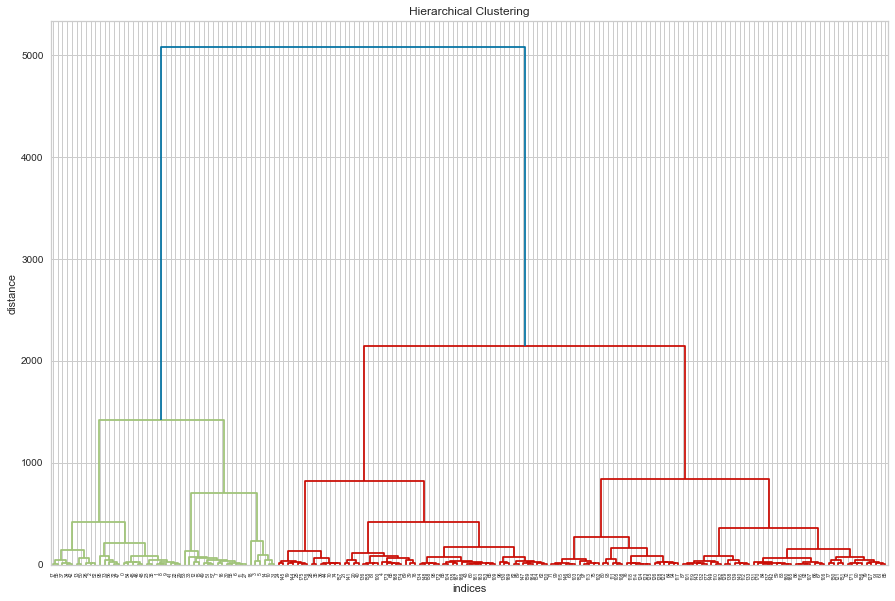

In [120]:
plt.figure(figsize = (15, 10))
sch.dendrogram(hc)
plt.title('Hierarchical Clustering')
plt.xlabel('indices')
plt.ylabel('distance')
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 1416.683338108347, 1416.683338108347, 0.0],
  [0.0, 2141.8849632509896, 2141.8849632509896, 0.0],
  [1416.683338108347,
   5078.327147402943,
   5078.327147402943,
   2141.8849632509896]],
 'ivl': ['(28)', '(20)', '(58)', '(72)'],
 'leaves': [347, 349, 350, 351],
 'color_list': ['C1', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C2', 'C2']}

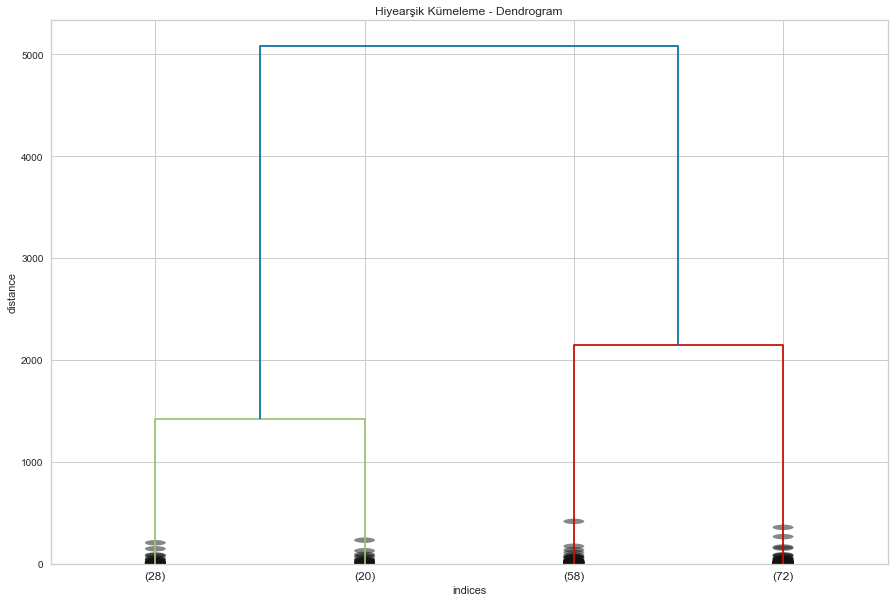

In [121]:
plt.figure(figsize = (15, 10))
plt.title("Hiyearşik Kümeleme - Dendrogram")
plt.xlabel('indices')
plt.ylabel('distance')
sch.dendrogram(hc,
          truncate_mode="lastp",
          p = 4,
          show_contracted=True)

In [123]:
hierarchical  = AgglomerativeClustering(n_clusters = 4,
                                  affinity= "euclidean",
                                  linkage = "ward").fit_predict(metadata)

In [125]:
dfff = metadata.copy()
dfff["Clusters for Hierarchical"] = hierarchical
dfff[0:5]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  cluster  Clusters for Hierarchical  
0   3.92     1065        1                          3  
1   3.40     1050        1                          3  
2   3.17     1185        1                          3  
3   3.45     1480        1                          1  
4   2.93      735        2                          2

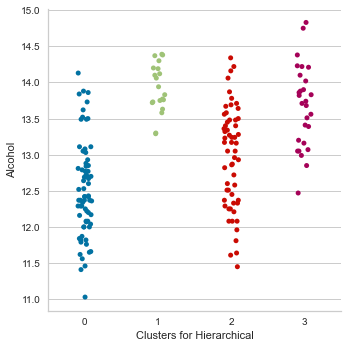

In [126]:
sns.catplot(x = "Clusters for Hierarchical", y = "Alcohol", data = dfff)

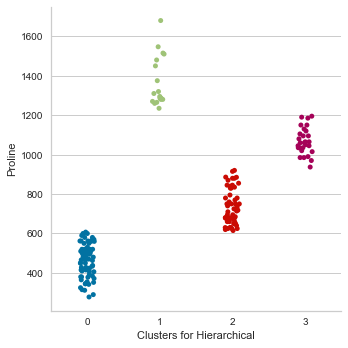

In [127]:
sns.catplot(x = "Clusters for Hierarchical", y = "Proline", data = dfff)